In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<b>1. Non-stationary time series</b>
Holt-Winters Exponential Smoothing

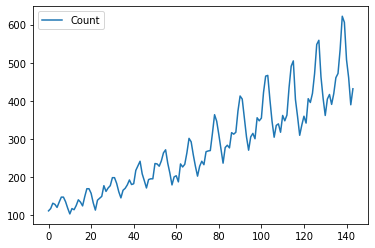

In [5]:
airlines_passengers.plot()
plt.show()
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [7]:
series = airlines_passengers["Count"]

In [8]:
df_train, df_test = series[:132], series[132:]

In [9]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

C:\Users\79653\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [10]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Count   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          12594.621
Optimized:                         True   AIC                            633.685
Trend:                         Additive   BIC                            679.810
Seasonal:                Multiplicative   AICC                           639.739
Seasonal Periods:                    12   Date:                 Sat, 27 May 2023
Box-Cox:                          False   Time:                         10:26:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3762289                alpha                 True
smoothing_trend          

In [11]:
passenger_forecast = fitted.forecast(steps=12)

In [12]:
print(f'Mean Squared Error = {mean_squared_error(series[132:],passenger_forecast)}')

Mean Squared Error = 249.97879380202423


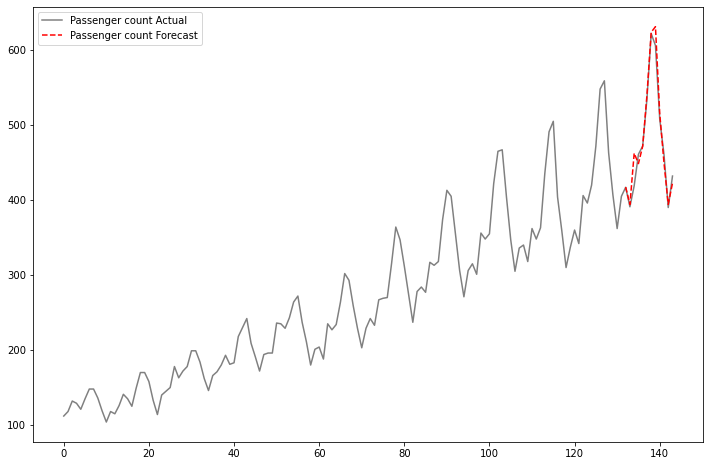

In [13]:
fig = plt.figure()
actual, = plt.plot(series.index, series, 'grey', label='Passenger count Actual')
forecast, = plt.plot(df_test.index, passenger_forecast, 'red', label='Passenger count Forecast', linestyle='dashed')
plt.legend(handles=[actual, forecast])
plt.show()

<b> 2. Stationary time series</b>
ARIMA

In [14]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [15]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


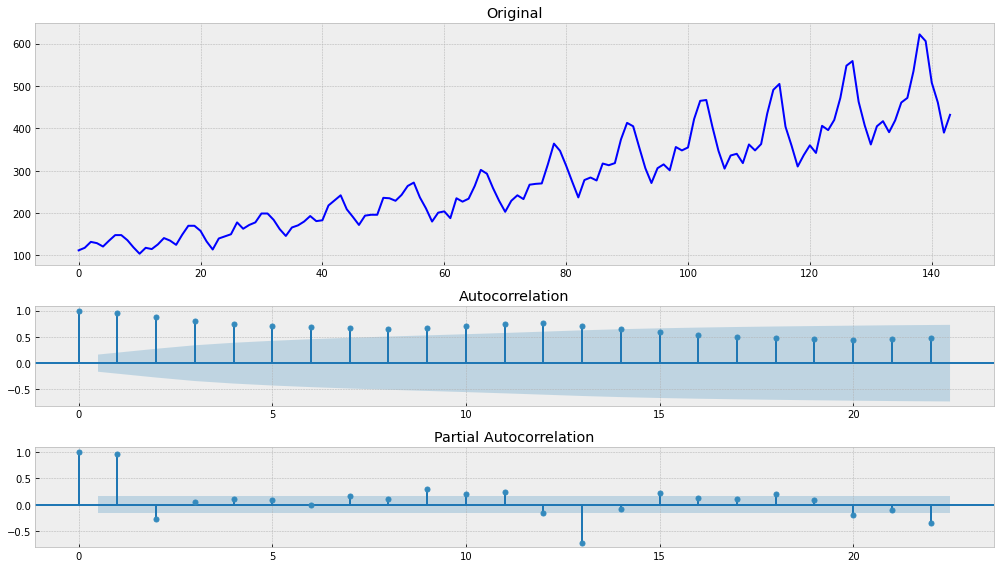

In [16]:
tsplot(series)

In [17]:
series_1, l = stats.boxcox(series)

In [18]:
series_1_1 = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.871708
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


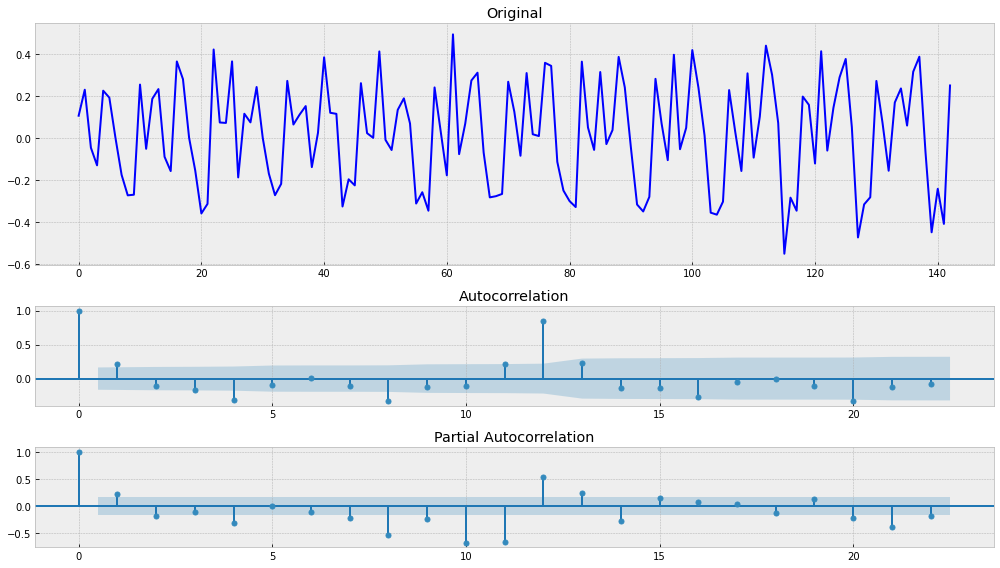

In [19]:
tsplot(series_1_1)

In [20]:
series_ = pd.Series(series_1_1)

In [21]:
series_.count()

143

In [22]:
df_1_train, df_1_test = series_[:120], series_[120:132]

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


model_1 = ARIMA(df_1_train, order=(5, 0, 2))
model_1_fit = model_1.fit(disp=False)

C:\Users\79653\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\79653\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

In [24]:
model_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(5, 2)   Log Likelihood                  26.582
Method:                       css-mle   S.D. of innovations              0.189
Date:                Sat, 27 May 2023   AIC                            -35.165
Time:                        10:26:27   BIC                            -10.077
Sample:                             0   HQIC                           -24.976
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.001     29.019      0.000       0.022       0.025
ar.L1.y       -0.0981      0.096     -1.020      0.308      -0.287       0.090
ar.L2.y        0.5334      0.091      5.863      0.000       0.355       0.712
ar.L3.y       -0.2769      0.101     -2.737      0.006      -0.475      -0.079
ar.L4.y       -0.1708      0.101     -1.687      0.092      -0.369       0.028
ar.L5.y       -0.2222      0.107     -2.072      0.038      -0.432      -0.012
ma.L1.y     1.036e-08      0.019   5.39e-07      1.000      -0.038       0.038
ma.L2.y       -1.0000      0.019    -52.062      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9468           -0.6814j            1.1665           -0.0993
AR.2            0.9468           +0.6814j            1.1665            0.0993
AR.3           -1.0163           -0.0000j            1.0163           -0.5000
AR.4           -0.8232           -1.6054j            1.8041           -0.3254
AR.5           -0.8232           +1.6054j            1.8041            0.3254
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
forecast_1 = pd.Series(model_1_fit.forecast(steps=12)[0])

In [31]:
test_ = pd.Series(df_1_test.reset_index(drop=True))

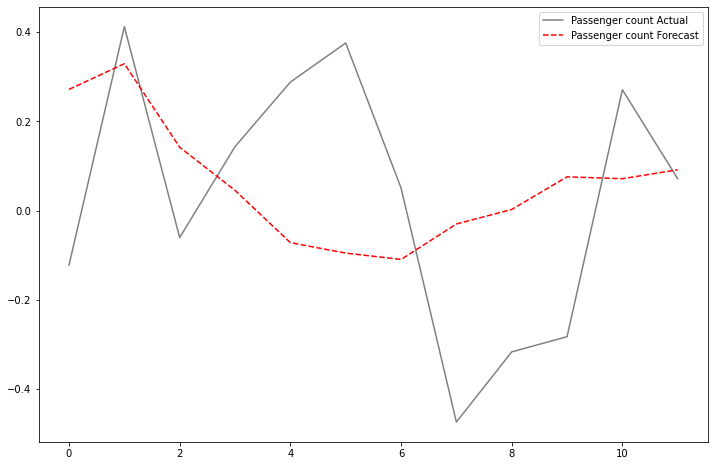

In [32]:
fig = plt.figure()
actual_1, = plt.plot(test_, 'grey', label='Passenger count Actual')
forecast_1, = plt.plot(forecast_1, 'red', label='Passenger count Forecast', linestyle='dashed')
plt.legend(handles=[actual_1, forecast_1])
plt.show()

In [ ]:
print(f'Mean Squared Error = {mean_squared_error(test_,forecast_1)}')

<b>Вывод</b>: для нестационарного временного ряда была использована модель Хольта-Винтерса, которая учитывает уровень, тренд и сезонность. Были спрогнозированы последние 12 месяцев из ряда. Расчетная модель характеризуется Mean Squared Error = 249.9787.
После этот же ряд был доведен до вида стационарного путем дифференцирования. Для стационарного временного ряда была опробована модель ARIMA (AutoRegressive Integrated Moving Average) и рассчитаны предпоследние 12 месяцев с Mean Squared Error = 0.088.


<b> 2.1 Stationary Time Series</b>
Moving Average + Weighted Moving Average

In [45]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [44]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

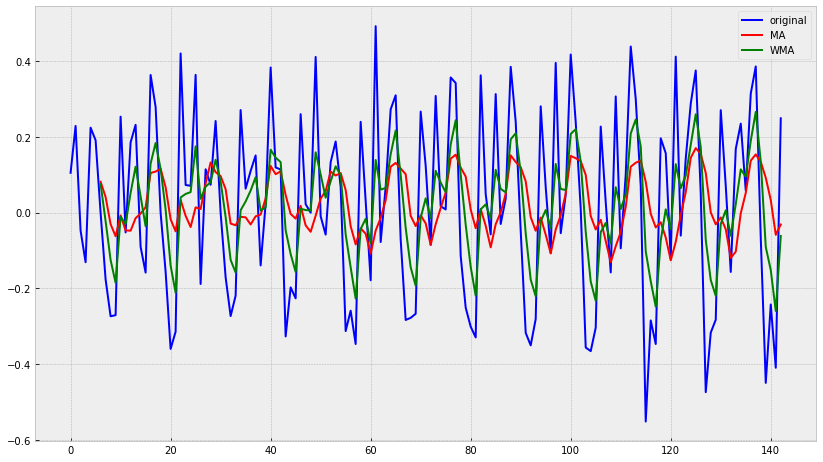

In [43]:
wma = weighted_moving_average(series_, 7, [1,1,2,3,5,8,13])
ma = moving_average(series_, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

In [46]:
df_2_test = series_[120:132]

In [50]:
forecast_ma = ma[120:132]
forecast_wma = wma[120:132]

In [51]:
print(f'Mean Squared Error = {mean_squared_error(df_2_test,forecast_ma)}')

Mean Squared Error = 0.07637971633762679


In [52]:
print(f'Mean Squared Error = {mean_squared_error(df_2_test,forecast_wma)}')

Mean Squared Error = 0.03532321478579985
